# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa as lr

# Integral vom "inneren Produkt" als Ähnlichkeitsmaß zweier Funktionen

<b style="background-color:lightyellow">Aufgaben für alle</b>

<b style="background-color:lightblue">optionale Aufgaben</b>

<br/>

<p><div style="background-color:lightyellow;border-style:groove">

**Aufgabe 1:**

Bearbeitet Aufgabe 2.1 aus Meinard Müllers "[Fundamentals of Music Processing: Audio, Analysis, Algorithms, Applications](https://books.google.de/books?id=HCI_CgAAQBAJ&pg=PA110&dq=fundamentals+of+music+processing+exercise+2.1&hl=de&sa=X&ved=2ahUKEwiKyuiwm5jqAhXKw8QBHY_-DZAQ6AEwAHoECAEQAg#v=onepage&q=fundamentals%20of%20music%20processing%20exercise%202.1&f=false)" auf Seite 110 und schreibt die Ergebnisse in eine Tabelle oder Liste.

</div></p>

|--|f1|f2|f3|f4|f5|f6|
|--|--|--|--|--|--|--|
|f1|--| 1|--|--|--|--|
|f2| 1|--|--|--|--|--|
|f3|--|--|--|--|--|--|
|f4|--|--|--|--|--|--|
|f5|--|--|--|--|--|--|
|f6|--|--|--|--|--|--|


- f1 <-> f1 : 
- f1 <-> f2 : 1
- f1 <-> f3 : 
- f1 <-> f4 : 
- f1 <-> f5 : 
- f1 <-> f6 : 
- f2 <-> f2 : 
- f2 <-> f3 : 
- f2 <-> f4 : 
- f2 <-> f5 : 
- f2 <-> f6 : 
- f3 <-> f3 : 
- f3 <-> f4 : 
- f3 <-> f5 : 
- f3 <-> f6 : 
- f4 <-> f4 : 
- f4 <-> f5 : 
- f4 <-> f6 : 
- f5 <-> f5 : 
- f5 <-> f6 : 
- f6 <-> f6 : 

# Ähnlichkeitsmaß "in Code"

Anstatt zu integrieren, rechnen wir im diskreten Bereich mit Summen.

Per Definition ist das Integral einer Funktion das Limit einer sog. Riemann Summe gen Unendlich:

${\displaystyle \int _{a}^{b}\!f(x)\,dx=\lim _{\|\Delta x\|\rightarrow 0}\sum _{i=1}^{n}f(x_i)\,\Delta x_i.}$

Wobei $\Delta x_i = \frac{b - a}{n}$ ist und $x_i = a + \Delta x \cdot i$

In unserem Fall ist $\Delta x_i = \frac{1}{Fs}$ ($Fs$ --> Sample-Rate) und $x_i$ ist der jeweilige Index unseres diskreten Audio-Signals.

<p><div style="background-color:lightblue;border-style:groove">

**Aufgabe 2:**

Im folgenden Beispiel sind wieder 6 Funktionen definiert. Befüllt durch verschachtelte Loops die Tabelle `sim_matrix` mit den jeweiligen Ähnlichkeitsmaßen (wie in Aufgabe 1), indem ihr jeweils die Summe des "inneren Produkts" durch $Fs$ dividiert.

</div></p>

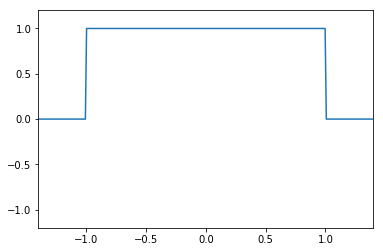

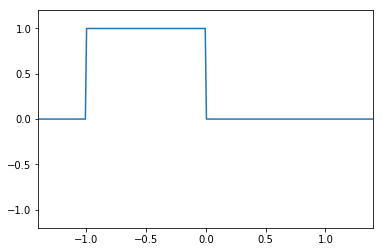

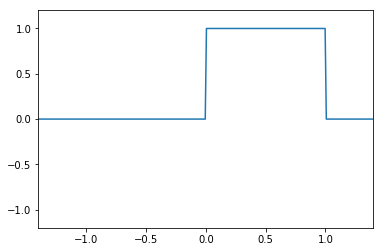

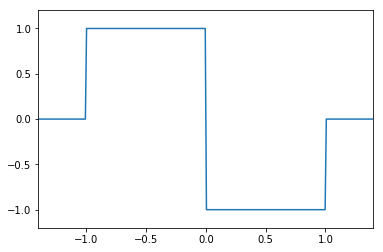

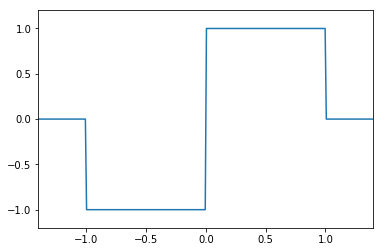

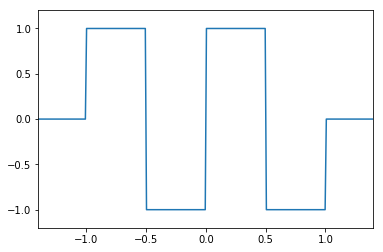

[[ 2.  1.  1.  0.  0.  0.]
 [ 1.  1.  0.  1. -1.  0.]
 [ 1.  0.  1. -1.  1.  0.]
 [ 0.  1. -1.  2. -2.  0.]
 [ 0. -1.  1. -2.  2.  0.]
 [ 0.  0.  0.  0.  0.  2.]]


In [2]:
sr = 100
length = 4
f1 = np.concatenate((np.zeros(sr), np.ones(int(sr * 2)), np.zeros(sr)))
f2 = np.concatenate((np.zeros(sr), np.ones(sr), np.zeros(int(sr * 2))))
f3 = np.concatenate((np.zeros(int(sr * 2)), np.ones(sr), np.zeros(sr)))
f4 = np.concatenate((np.zeros(sr), np.ones(sr), np.ones(sr) * -1, np.zeros(sr)))
f5 = np.concatenate((np.zeros(sr), np.ones(sr) * -1, np.ones(sr), np.zeros(sr)))
f6 = np.concatenate((np.zeros(sr), np.ones(int(sr / 2)), np.ones(int(sr / 2)) * -1, np.ones(int(sr / 2)), np.ones(int(sr / 2)) * -1, np.zeros(sr)))
t = np.linspace(length / -2, length /  2, int(sr * length))

funcs = np.array([f1, f2, f3, f4, f5, f6])

sim_matrix = np.zeros((6, 6))

for y, func1 in enumerate(funcs):
    
    plt.plot(t, func1)
    plt.ylim(-1.2, 1.2)
    plt.xlim(length / -2 + 0.6, length / 2 - 0.6)
    plt.show()
    
    for x, func2 in enumerate(funcs):
        
        sim_matrix[x, y] = np.sum(func1 * func2) / sr
        
print(sim_matrix)